<a href="https://colab.research.google.com/github/Dhwani294/PowerBI/blob/main/22054134_datapool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('/content/sample_data/Op_WL 2021.csv')

# Display the first few rows to understand the dataset
df.head()


,Archive_Date,Specialty_HIPE,Speciality,Adult_Child,Age_Profile,Time_Bands,Total
0,31-01-2021,601,Paediatric ENT,Child,0-15,6-9 Months,292
1,31-01-2021,1302,Paediatric Neurology,Child,0-15,15-18 Months,22
2,31-01-2021,1302,Paediatric Neurology,Child,16-64,18 Months +,16
3,31-01-2021,1503,Gynaecology,Child,0-15,0-3 Months,62
4,31-01-2021,1503,Gynaecology,Child,0-15,6-9 Months,37


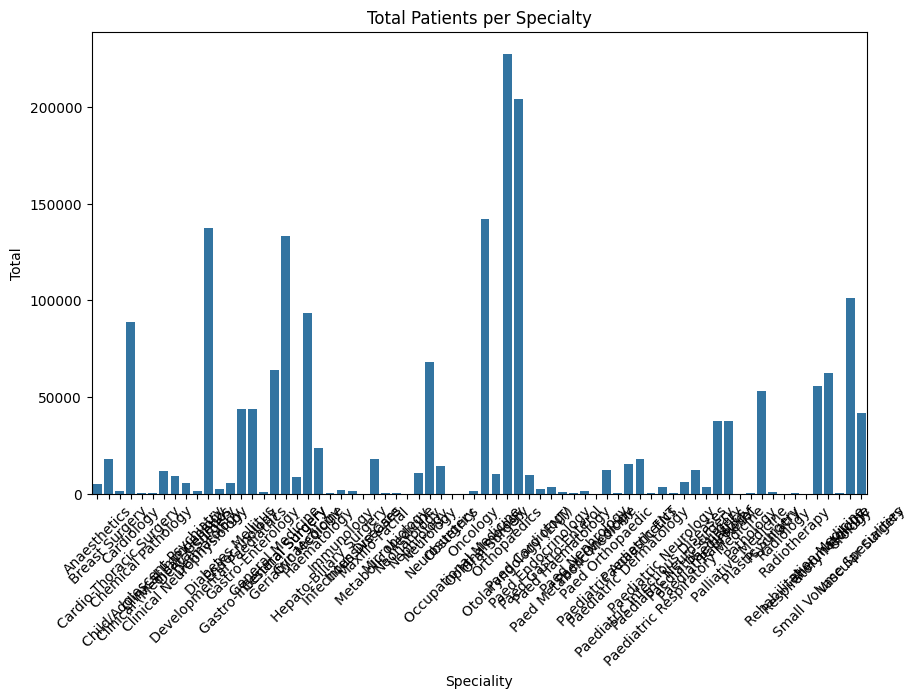

In [13]:
# Grouping by Specialty and summing the total patients
specialty_total = df.groupby('Speciality')['Total'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Speciality', y='Total', data=specialty_total)
plt.title('Total Patients per Specialty')
plt.xticks(rotation=45)
plt.show()


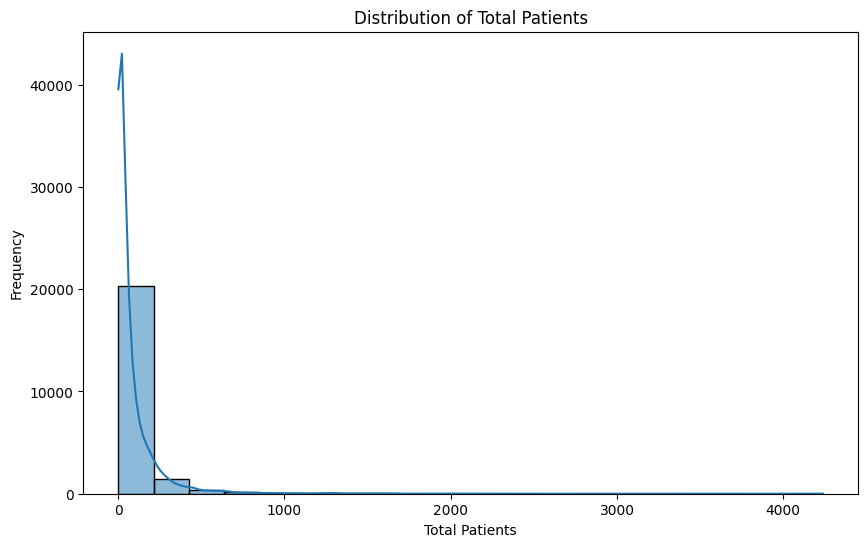

In [14]:
# Plotting a histogram of the 'Total' column
plt.figure(figsize=(10,6))
sns.histplot(df['Total'], bins=20, kde=True)
plt.title('Distribution of Total Patients')
plt.xlabel('Total Patients')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


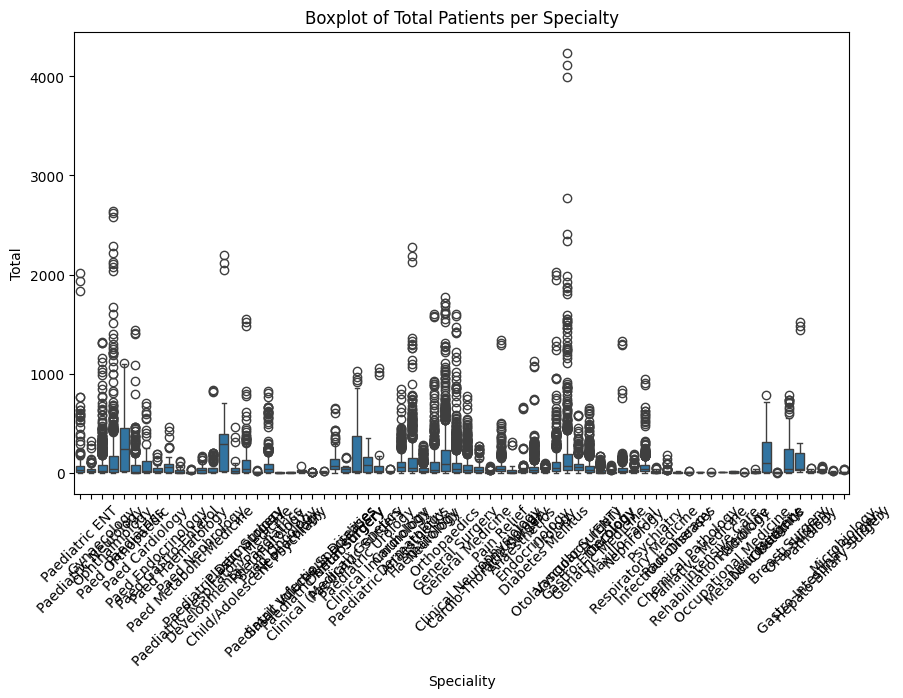

In [15]:
# Boxplot for Total patients per Specialty
plt.figure(figsize=(10,6))
sns.boxplot(x='Speciality', y='Total', data=df)
plt.title('Boxplot of Total Patients per Specialty')
plt.xticks(rotation=45)
plt.show()


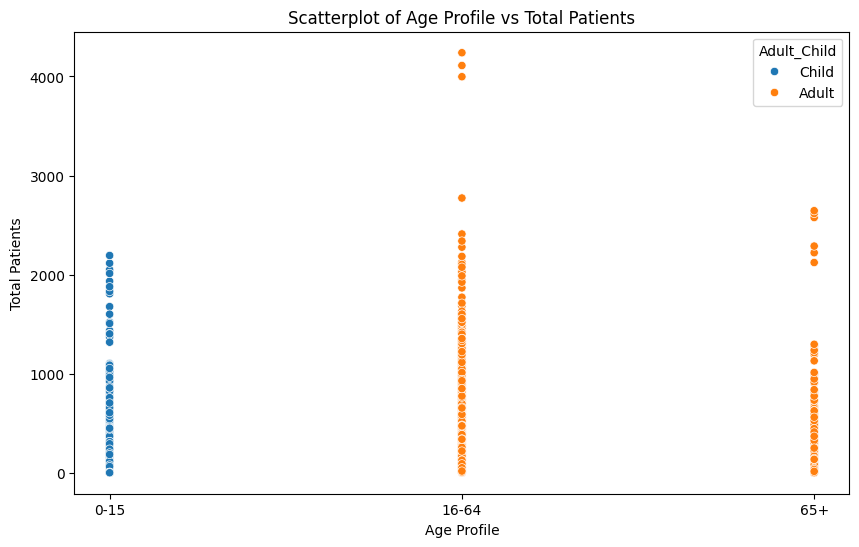

In [16]:
# Scatterplot for Age Profile vs Total
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_Profile', y='Total', data=df, hue='Adult_Child')
plt.title('Scatterplot of Age Profile vs Total Patients')
plt.xlabel('Age Profile')
plt.ylabel('Total Patients')
plt.show()


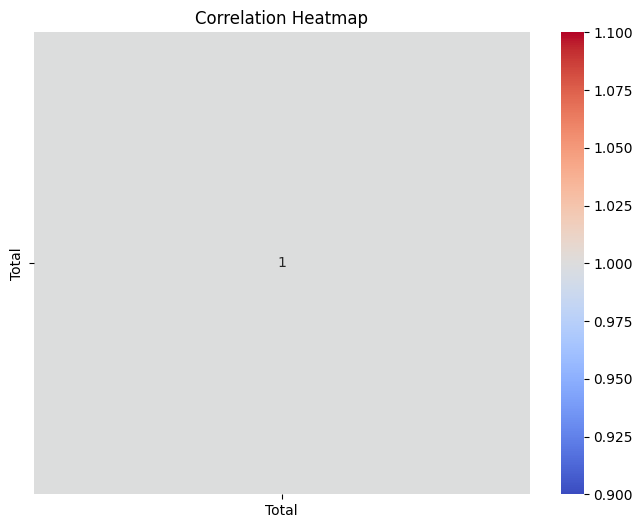

In [17]:
# If there are more numerical columns, you'd add them here for correlation
numerical_cols = ['Total']  # Add more if applicable

# Compute correlation
corr_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


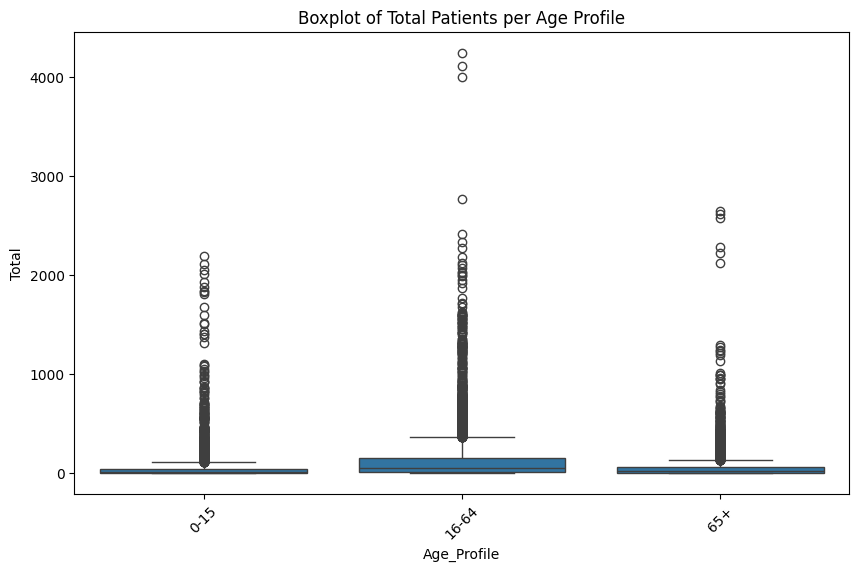

In [20]:
# Boxplot of Total patients per Age Profile
plt.figure(figsize=(10,6))
sns.boxplot(x='Age_Profile', y='Total', data=df)
plt.title('Boxplot of Total Patients per Age Profile')
plt.xticks(rotation=45)
plt.show()


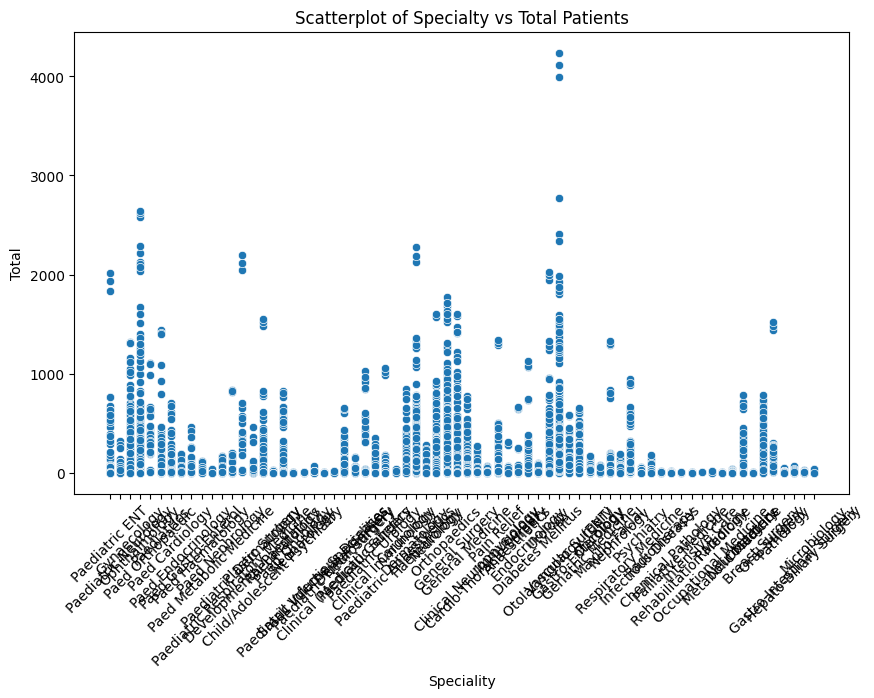

In [22]:
# Scatterplot for Specialty vs Total
plt.figure(figsize=(10,6))
sns.scatterplot(x='Speciality', y='Total', data=df)
plt.title('Scatterplot of Specialty vs Total Patients')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


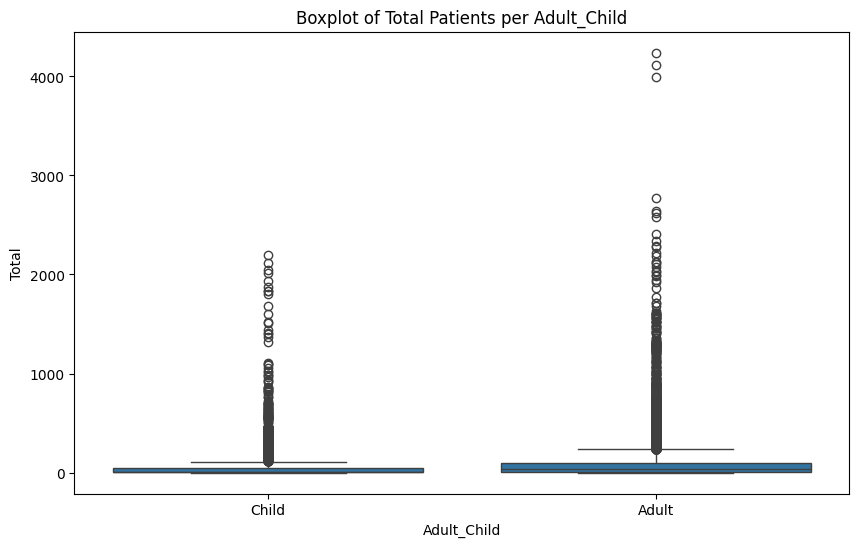

In [23]:
# Boxplot of Total patients per Adult/Child
plt.figure(figsize=(10,6))
sns.boxplot(x='Adult_Child', y='Total', data=df)
plt.title('Boxplot of Total Patients per Adult_Child')
plt.show()


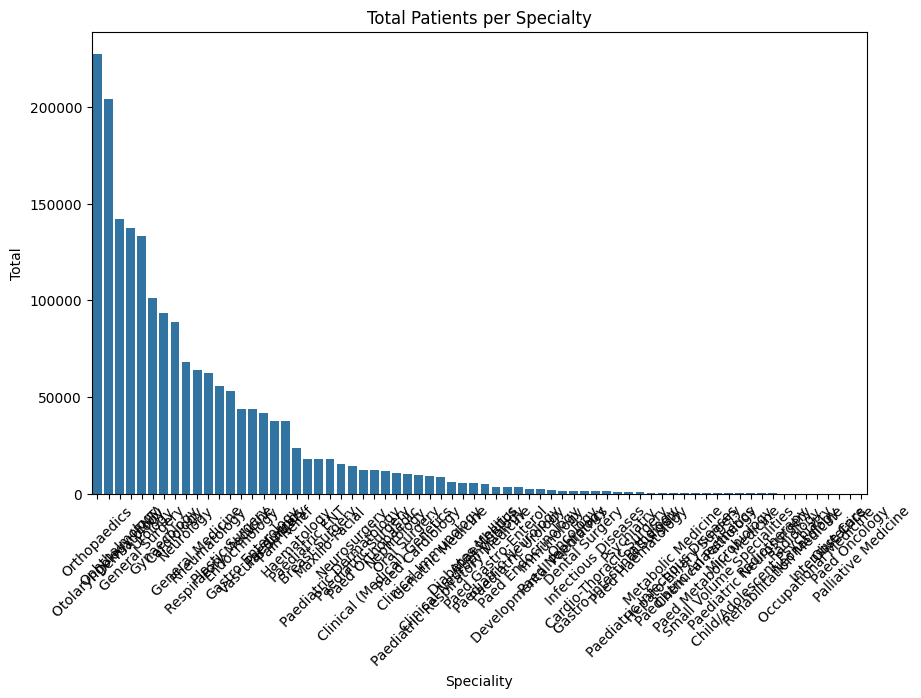

In [26]:
# Grouping by Specialty and summing the Total patients
specialty_utilization = df.groupby('Speciality')['Total'].sum().reset_index()

# Sorting and visualizing the top specialties
specialty_utilization = specialty_utilization.sort_values(by='Total', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Speciality', y='Total', data=specialty_utilization)
plt.title('Total Patients per Specialty')
plt.xticks(rotation=45)
plt.show()


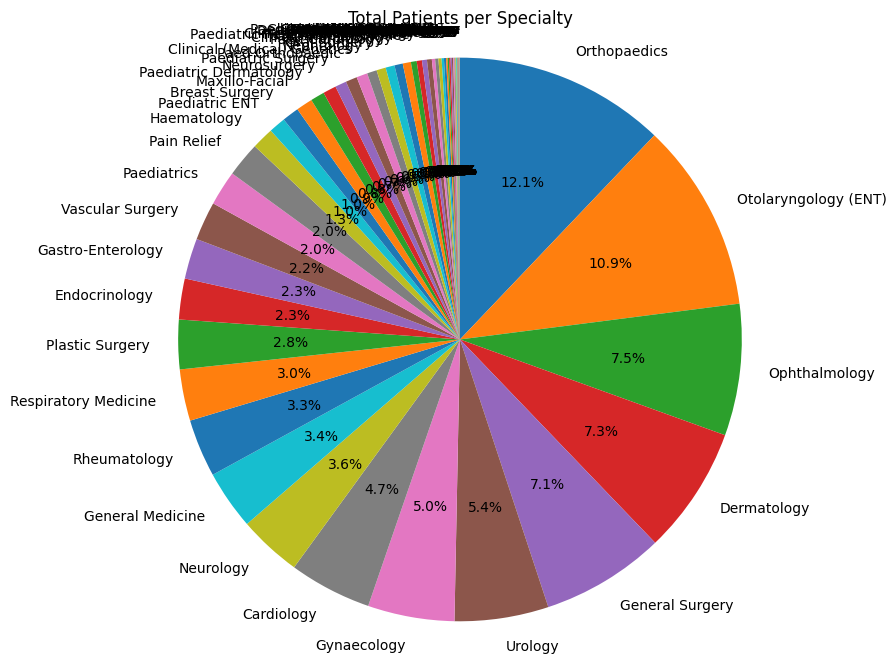

In [32]:
# Grouping by Specialty and summing the Total patients
specialty_utilization = df.groupby('Speciality')['Total'].sum().reset_index()

# Sorting by Total patients in descending order
specialty_utilization = specialty_utilization.sort_values(by='Total', ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8,8))  # Adjust the figure size as needed
plt.pie(specialty_utilization['Total'], labels=specialty_utilization['Speciality'],
        autopct='%1.1f%%', startangle=90, counterclock=False)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Total Patients per Specialty')
plt.show()


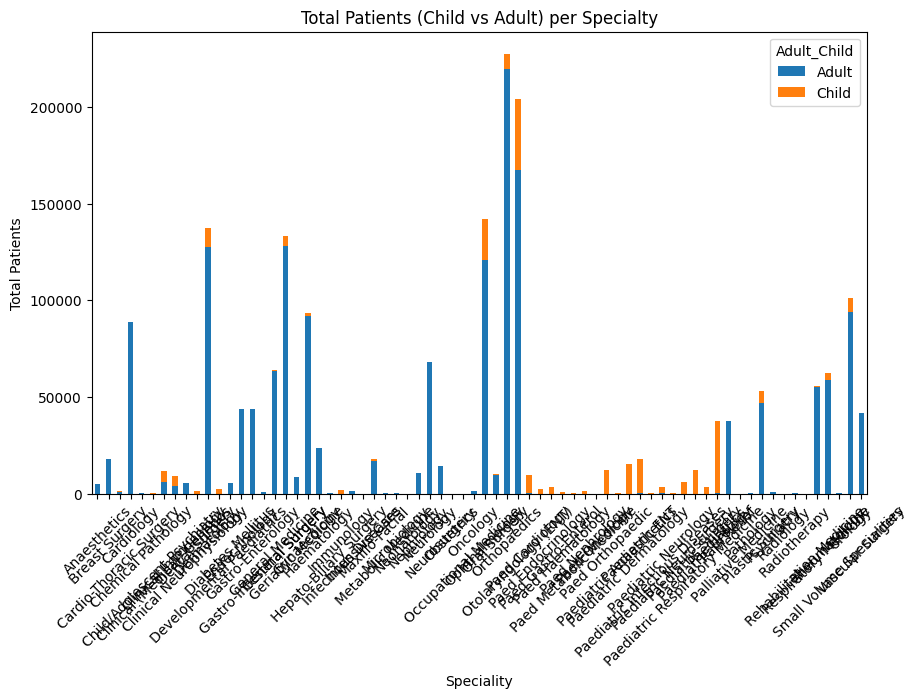

In [27]:
# Grouping by Adult_Child and Specialty
child_vs_adult = df.groupby(['Speciality', 'Adult_Child'])['Total'].sum().unstack()

# Plotting the results
child_vs_adult.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Patients (Child vs Adult) per Specialty')
plt.ylabel('Total Patients')
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-f6dcb6211b60>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])


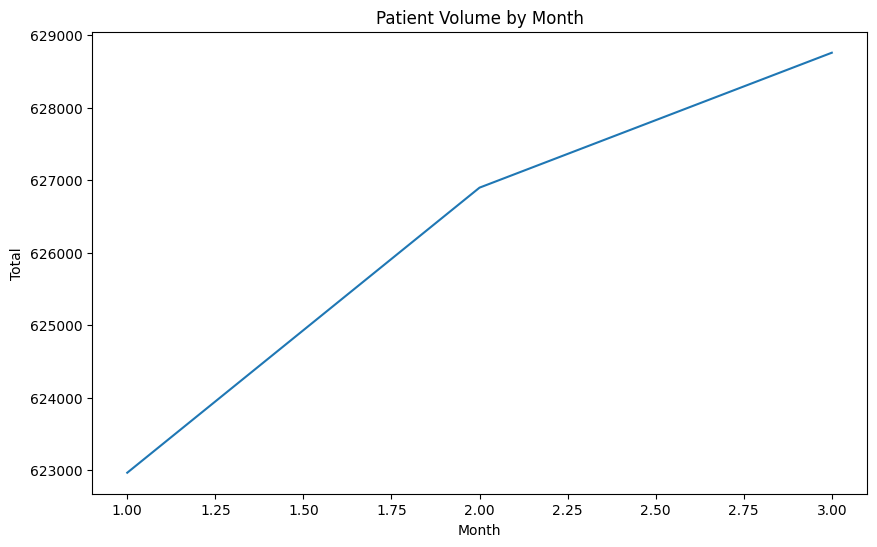

In [29]:
# Convert Archive Date to datetime and extract the month
df['Archive_Date'] = pd.to_datetime(df['Archive_Date'])
df['Month'] = df['Archive_Date'].dt.month

# Grouping by month and plotting
monthly_trends = df.groupby('Month')['Total'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Total', data=monthly_trends)
plt.title('Patient Volume by Month')
plt.show()


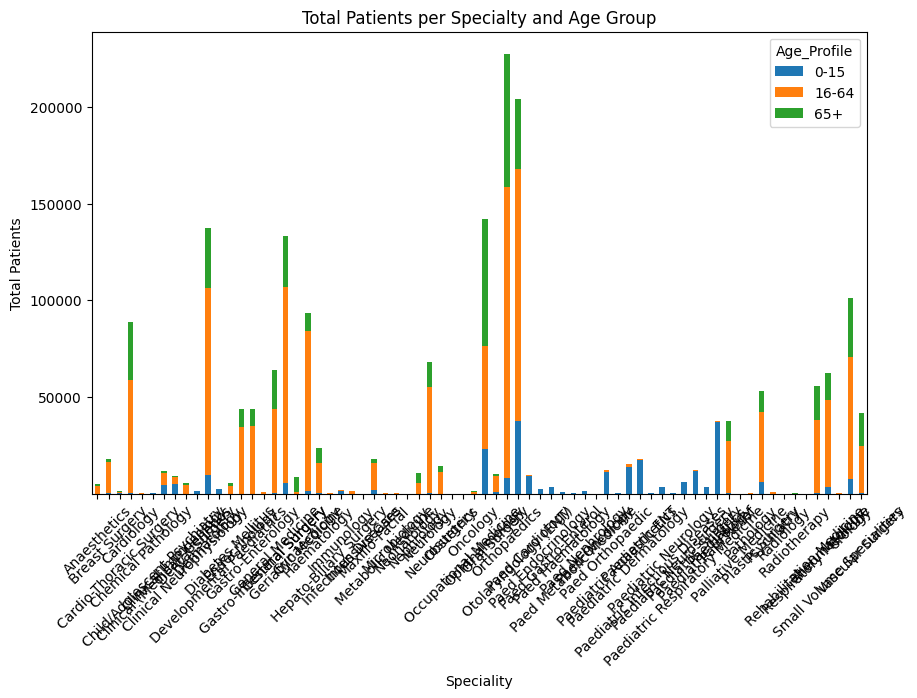

In [30]:
# Grouping by Specialty and Age Profile
specialty_age_group = df.groupby(['Speciality', 'Age_Profile'])['Total'].sum().unstack()

# Plotting the results
specialty_age_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Patients per Specialty and Age Group')
plt.ylabel('Total Patients')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


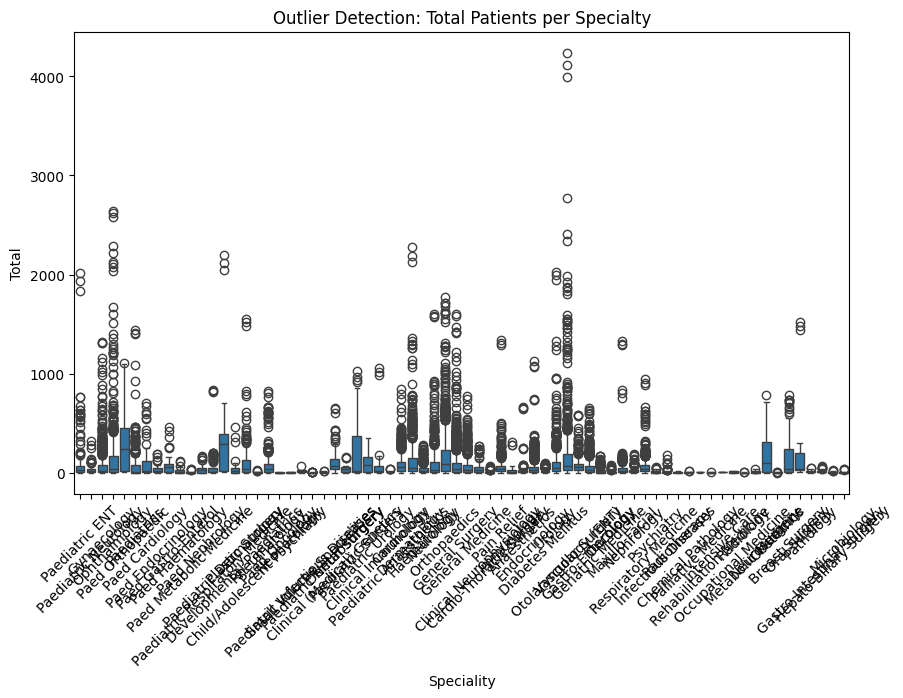

In [31]:
# Boxplot to detect outliers in Total patients per Specialty and Time Band
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Speciality', y='Total')
plt.title('Outlier Detection: Total Patients per Specialty')
plt.xticks(rotation=45)
plt.show()
